In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

# Replace the filename with the exact one you uploaded
df = pd.read_csv('data.csv')  # example: 'uvvis_195_198.txt'
df.head()


,Baseline 100%T,Unnamed: 1,195,Unnamed: 3,198,Unnamed: 5,Unnamed: 6
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3040,10,3040,-0.361723274,3040,-0.1492400318,NaN
2,3044.099121,10,3044.099121,-0.1977719069,3044.099121,-0.2032958716,NaN
3,3048.197998,10,3048.197998,-0.4353569448,3048.197998,-0.1244355068,NaN
4,3052.297119,3.906856537,3052.297119,10,3052.297119,10,NaN


In [ ]:
import pandas as pd

df = pd.read_csv('uvvis_195_198.txt')  # This is the correct file name
df.head()


,Baseline 100%T,Unnamed: 1,195,Unnamed: 3,198,Unnamed: 5,Unnamed: 6
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3040,10,3040,-0.361723274,3040,-0.1492400318,NaN
2,3044.099121,10,3044.099121,-0.1977719069,3044.099121,-0.2032958716,NaN
3,3048.197998,10,3048.197998,-0.4353569448,3048.197998,-0.1244355068,NaN
4,3052.297119,3.906856537,3052.297119,10,3052.297119,10,NaN


In [ ]:
df.columns


Index(['Baseline 100%T', 'Unnamed: 1', '195', 'Unnamed: 3', '198',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [ ]:
df.columns = [
    'Baseline',        # Was 'Baseline 100%T'
    'Wavenumber_1',    # Was 'Unnamed: 1'
    'Abs_195',         # Was '195'
    'Wavenumber_2',    # Was 'Unnamed: 3'
    'Abs_198',         # Was '198'
    'Wavenumber_3',    # Was 'Unnamed: 5'
    'Extra_1'          # Was 'Unnamed: 6'
]

df.head()


,Baseline,Wavenumber_1,Abs_195,Wavenumber_2,Abs_198,Wavenumber_3,Extra_1
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3040,10,3040,-0.361723274,3040,-0.1492400318,NaN
2,3044.099121,10,3044.099121,-0.1977719069,3044.099121,-0.2032958716,NaN
3,3048.197998,10,3048.197998,-0.4353569448,3048.197998,-0.1244355068,NaN
4,3052.297119,3.906856537,3052.297119,10,3052.297119,10,NaN


In [ ]:
# Convert text to numeric values (ignore errors)
df['Baseline'] = pd.to_numeric(df['Baseline'], errors='coerce')
df['Abs_195'] = pd.to_numeric(df['Abs_195'], errors='coerce')
df['Abs_198'] = pd.to_numeric(df['Abs_198'], errors='coerce')


In [ ]:
df['Corrected_195'] = df['Abs_195'] - df['Baseline']
df['Corrected_198'] = df['Abs_198'] - df['Baseline']

df[['Baseline', 'Abs_195', 'Corrected_195', 'Abs_198', 'Corrected_198']].head()


,Baseline,Abs_195,Corrected_195,Abs_198,Corrected_198
0,NaN,NaN,NaN,NaN,NaN
1,3040.000000,3040.000000,0.0,3040.000000,0.0
2,3044.099121,3044.099121,0.0,3044.099121,0.0
3,3048.197998,3048.197998,0.0,3048.197998,0.0
4,3052.297119,3052.297119,0.0,3052.297119,0.0


In [ ]:
df['Wavenumber_2'] = pd.to_numeric(df['Wavenumber_2'], errors='coerce')


In [ ]:
df_clean = df.dropna(subset=['Wavenumber_2', 'Corrected_195', 'Corrected_198'])


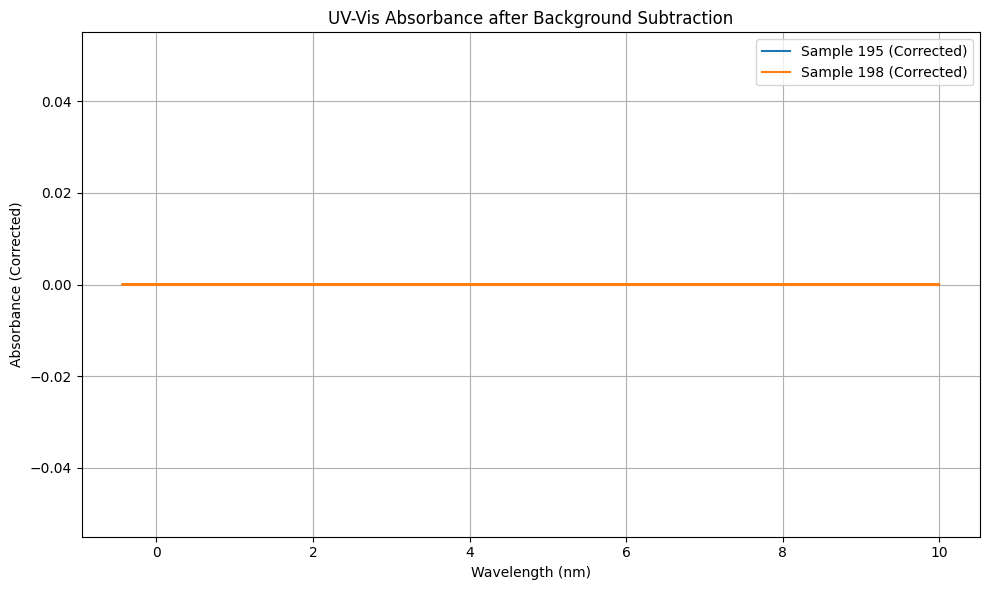

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_clean['Wavenumber_2'], df_clean['Corrected_195'], label='Sample 195 (Corrected)')
plt.plot(df_clean['Wavenumber_2'], df_clean['Corrected_198'], label='Sample 198 (Corrected)')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (Corrected)')
plt.title('UV-Vis Absorbance after Background Subtraction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


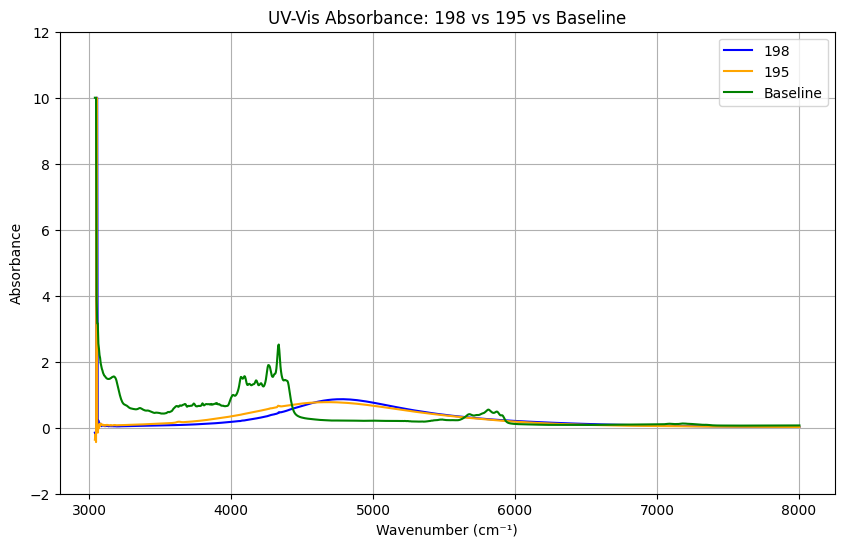

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('data.csv', skiprows=1)

# Rename columns
df.columns = ['Wavenumber', 'Baseline', 'Wavenumber_195', 'Abs_195', 'Wavenumber_198', 'Abs_198', 'Extra']

# Convert to numeric
cols_to_convert = ['Wavenumber', 'Baseline', 'Abs_195', 'Abs_198']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Wavenumber'], df['Abs_198'], label='198', color='blue')
plt.plot(df['Wavenumber'], df['Abs_195'], label='195', color='orange')
plt.plot(df['Wavenumber'], df['Baseline'], label='Baseline', color='green')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title('UV-Vis Absorbance: 198 vs 195 vs Baseline')
plt.legend()
plt.grid(True)
plt.ylim(-2, 12)
plt.show()
